# Este programa faz uma análise do campo "vacina_descricao_dose"
# para identificar se é a 1. Dose ou já e a 2.Dose da vacina
# contra a COVID-19


In [1]:
# Importar bibliotecas importantes:

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import requests 

# Tratando a data de aplicacao da vacina

import time
from datetime import datetime
import csv

import seaborn as sns
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:


df = pd.read_csv("BD_Vacina_Amostra-06-05-2021.csv", sep=";")
usecols = ['vacina_fabricante_nome',
                 'paciente_idade',
                 'paciente_id',
                 'vacina_dataAplicacao',
                 'paciente_endereco_uf',
                 'vacina_descricao_dose']

                 

                 

# Tratando o campo "vacina_dataAplicacao"  para verificar a data de
# aplicação da Vacina Primeira Dose e se após um tempo tomou a 
# Segunda Dose:

In [2]:
#Verificar o conteúdo do campo "vacina_descricao_dose"

df["vacina_descricao_dose"].unique()

array(['\xa0\xa0\xa0\xa02ª\xa0Dose', '\xa0\xa0\xa0\xa01ª\xa0Dose'],
      dtype=object)

In [ ]:
# Fazendo uma limpeza do campo "vacina_descricao_dose"
# Cria um campo de "copia_vacia_dose"


In [40]:
# Fazendo uma limpeza do campo "vacina_descricao_dose":

# 1) Transformando todos as linhas como Minuúsculas
# 2) Quando aparecer Null (NaN) substitui-se por "-"
# 3) Tratando todos os caracteres ASCII 

df["vacina_descricao_dose"] = (df["vacina_descricao_dose"]
                                 .str.lower()
                                 .str.normalize("NFKD")
                                 .str.lstrip()
                                 .str.replace(" ","_")
                                 .str.encode("ascii", errors="ignore")
                                 .str.decode("utf-8"))


In [41]:
df["vacina_descricao_dose"].unique()


array(['2a_dose', '1a_dose'], dtype=object)

In [38]:
df.shape

(494, 33)

In [42]:
# Mostra a quantidade de vacinados com a 1a_dose e 2a_dose'

df["vacina_descricao_dose"].value_counts()


1a_dose    349
2a_dose    145
Name: vacina_descricao_dose, dtype: int64

<AxesSubplot:>

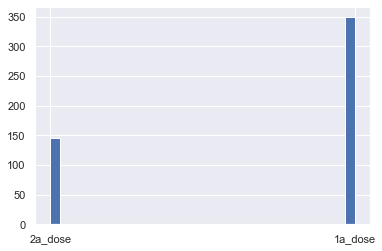

In [43]:
df['vacina_descricao_dose'].hist(bins=30)

# Criando um Pivot table para calcular pessoas vacinadas
## com a 1. dose e 2. dose

In [95]:
test = df

doses_pivot = pd.pivot_table(data = test,
                            index = "paciente_id",
                            columns = "vacina_descricao_dose",
                            values = "vacina_dataAplicacao",
                            aggfunc = "count",
                            fill_value = np.nan)


In [96]:
#Tomaram primeira e segunda dose:
# Aqueles que nao sao nulos para segunda dose e para primeira dose:


print("Criando o doses_pivot...")

doses_pivot.loc[(~doses_pivot["2a_dose"].isnull()) & 
                (~doses_pivot["1a_dose"].isnull())]


Criando o doses_pivot...


vacina_descricao_dose,1a_dose,2a_dose
paciente_id,,
6c62b4b30f72b5dea26d914c5ede09ec6d75e4bbe8f01bac4242a7cdc10f14c3,1.0,1.0


# Tomaram primeira e segunda dose:
# Aqueles que nao sao nulos para segunda dose e para primeira dose:



<AxesSubplot:title={'center':'Vacinados no Brasil'}, xlabel='vacina_descricao_dose', ylabel='Count'>

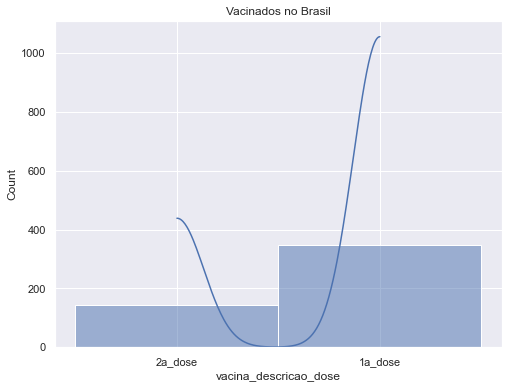

In [97]:
fig = plt.figure(figsize = (8,6))


plt.title("Vacinados no Brasil")

sns.histplot(data=test, x="vacina_descricao_dose", kde=True)





<AxesSubplot:xlabel='vacina_descricao_dose', ylabel='count'>

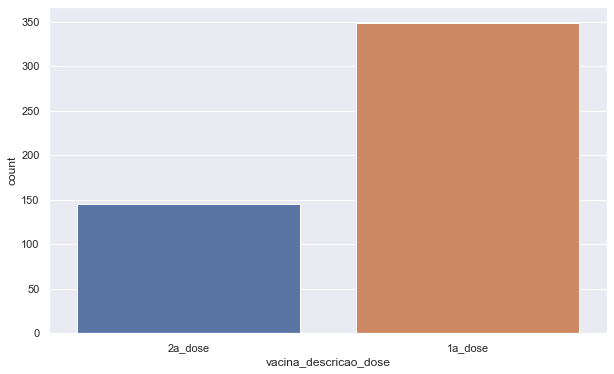

In [77]:
plt.figure(figsize = (10,6))
sns.countplot(data=test, x = "vacina_descricao_dose")